#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Aaron\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Aaron\AppData\Roa

# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [9]:
#卷積層1

In [10]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [11]:
model.add(Dropout(rate=0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [13]:
#卷積層2與池化層2

In [14]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [18]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [19]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [20]:
model.add(Dense(10, activation='softmax'))

In [21]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [28]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [25]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 43s 1ms/step - loss: 2.1678 - acc: 0.1963 - val_loss: 2.0500 - val_acc: 0.2926
Epoch 2/12
37500/37500 [==============================] - 43s 1ms/step - loss: 1.9560 - acc: 0.2970 - val_loss: 1.9414 - val_acc: 0.3462
Epoch 3/12
37500/37500 [==============================] - 39s 1ms/step - loss: 1.8379 - acc: 0.3465 - val_loss: 1.8462 - val_acc: 0.3762
Epoch 4/12
37500/37500 [==============================] - 40s 1ms/step - loss: 1.7344 - acc: 0.3828 - val_loss: 1.7521 - val_acc: 0.4148
Epoch 5/12
37500/37500 [==============================] - 43s 1ms/step - loss: 1.6573 - acc: 0.4073 - val_loss: 1.6902 - val_acc: 0.4214
Epoch 6/12
37500/37500 [==============================] - 37s 978us/step - loss: 1.5942 - acc: 0.4309 - val_loss: 1.6206 - val_acc: 0.4590
Epoch 7/12
37500/37500 [==============================] - 37s 981us/step - loss: 1.5421 - acc: 0.4488 - val_loss: 1.5736 - val

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

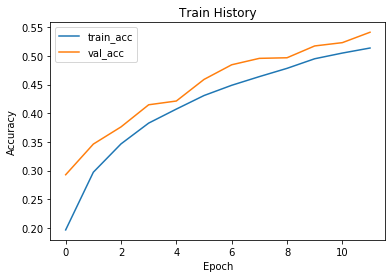

In [27]:
show_train_history('acc','val_acc')

In [29]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [30]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 38s 1ms/step - loss: 0.2051 - acc: 0.9191 - val_loss: 0.2145 - val_acc: 0.9142
Epoch 2/12
37500/37500 [==============================] - 42s 1ms/step - loss: 0.2048 - acc: 0.9195 - val_loss: 0.2139 - val_acc: 0.9146
Epoch 3/12
37500/37500 [==============================] - 37s 981us/step - loss: 0.2041 - acc: 0.9197 - val_loss: 0.2142 - val_acc: 0.9147
Epoch 4/12
37500/37500 [==============================] - 37s 980us/step - loss: 0.2034 - acc: 0.9202 - val_loss: 0.2137 - val_acc: 0.9147
Epoch 5/12
37500/37500 [==============================] - 37s 980us/step - loss: 0.2027 - acc: 0.9202 - val_loss: 0.2119 - val_acc: 0.9155
Epoch 6/12
37500/37500 [==============================] - 37s 989us/step - loss: 0.2029 - acc: 0.9204 - val_loss: 0.2117 - val_acc: 0.9153
Epoch 7/12
37500/37500 [==============================] - 37s 986us/step - loss: 0.2020 - acc: 0.9203 - val_loss: 0.2109

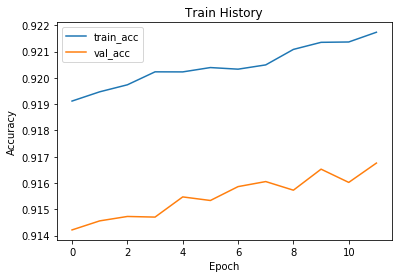

In [31]:
show_train_history('acc','val_acc')

In [35]:
model.compile(loss= 'mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [36]:
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)     

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 38s 1ms/step - loss: 0.0588 - acc: 0.5479 - val_loss: 0.0611 - val_acc: 0.5655
Epoch 2/12
37500/37500 [==============================] - 47s 1ms/step - loss: 0.0586 - acc: 0.5507 - val_loss: 0.0611 - val_acc: 0.5673
Epoch 3/12
37500/37500 [==============================] - 37s 978us/step - loss: 0.0586 - acc: 0.5512 - val_loss: 0.0611 - val_acc: 0.5671
Epoch 4/12
37500/37500 [==============================] - 37s 978us/step - loss: 0.0586 - acc: 0.5503 - val_loss: 0.0610 - val_acc: 0.5674
Epoch 5/12
37500/37500 [==============================] - 37s 979us/step - loss: 0.0586 - acc: 0.5498 - val_loss: 0.0610 - val_acc: 0.5670
Epoch 6/12
37500/37500 [==============================] - 37s 978us/step - loss: 0.0586 - acc: 0.5478 - val_loss: 0.0609 - val_acc: 0.5706
Epoch 7/12
37120/37500 [============================>.] - ETA: 0s - loss: 0.0584 - acc: 0.5506

KeyboardInterrupt: 

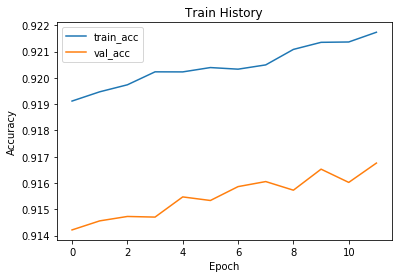

In [37]:
show_train_history('acc','val_acc')